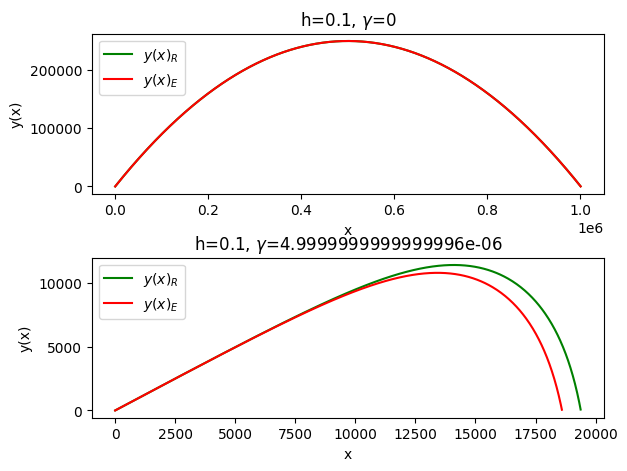

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g=10
v_0=1000
theta=np.pi/4
m=3.5*10**-3
gamma_list=[0,5*10**-6]
h=0.1
t=np.arange(0,1000,0.01)

# Plots
fig,axs=plt.subplots(2,1)
plt.subplots_adjust(left=0.1,
bottom=0.1,
right=0.9,
top=0.9,
wspace=0.4,
hspace=0.4)

# Stop function
def Stop(s,p,t):
    for i in range(0,np.size(t)-1):
        if s[1,i]>=0:
            s[:,i+1]=s[:,i] + p[:,i]
        else:
            s_new=s[:,0:i]
            break
    return s_new

# Set initial conditions function
def Set_init(t,theta):
    s=np.empty((2,np.size(t)))
    s[:,0]=np.array([v_0*np.cos(theta),
                   v_0*np.sin(theta)])
    p=np.empty((2,np.size(t)))
    p[:,0]=np.array([0,0])
    return s,p        

for j,gamma in enumerate(gamma_list):
    
    f=lambda u: np.array([-(gamma/m)*u[0]*(u[0]**2+u[1]**2)**0.5,
                          -(gamma/m)*u[1]*(u[0]**2+u[1]**2)**0.5-g])
    
    [u_E,xy_E]=Set_init(t,theta)
    [u_RK,xy_RK]=Set_init(t,theta)
    
    # Euler solutions
    for i in range(0,np.size(t)-1):
        u_E[:,i+1]=u_E[:,i]+h*f(u_E[:,i])
        
    xy_new_E=Stop(xy_E,u_E,t)
    
    # RK solutions
    for i in range(0,np.size(t)-1):        
        l=u_RK[:,i]
        k1=h*f(l)
        k2=h*f(l+k1/2)
        k3=h*f(l+k2/2)
        k4=h*f(l+k3)
        u_RK[:,i+1]=l+1/6*(k1+2*k2+2*k3+k4)

    xy_new_RK=Stop(xy_RK,u_RK,t)
    
    # Plots
    axs[j].plot(xy_new_RK[0,:],xy_new_RK[1,:],'g',
                label='$y(x)_R$')
    axs[j].plot(xy_new_E[0,:],xy_new_E[1,:],'r',
                label='$y(x)_E$')
    axs[j].set_xlabel('x')
    axs[j].set_ylabel('y(x)')
    axs[j].legend(loc='upper left')
    axs[j].set_title(f'h={h}, $\gamma$={gamma}')

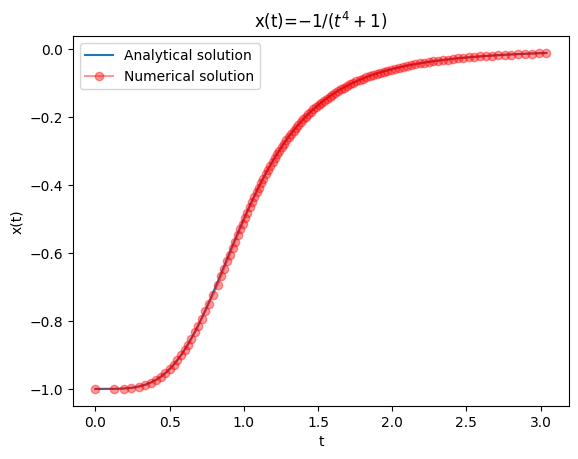

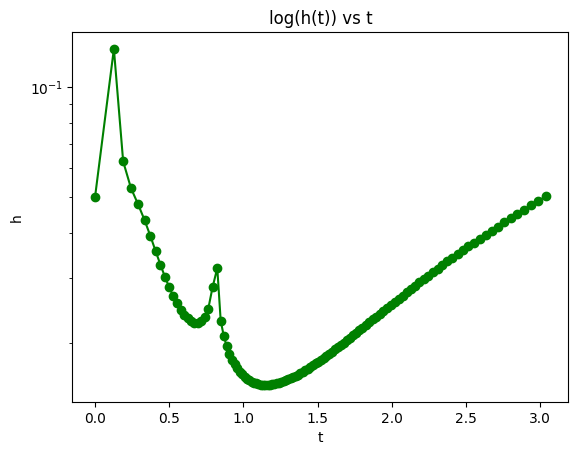

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dxdt=lambda t,x: 4*t**3*x**2
t=0
x=-1
h=0.05
delta0=10**-9

# Array initiations
position=np.array([x])
time=np.array([t])
h_vector=np.array([h])

# RK function
def RK(dxdt,t,x,h):
    k1 = h*dxdt(t,x)
    k2 = h*dxdt(t+h/2,x+k1/2)
    k3 = h*dxdt(t+h/2,x+k2/2)
    k4 = h*dxdt(t+h,x+k3)
    x_next=x+(k1+2*k2+2*k3+k4)/6
    return x_next

while t<3:
    one_step=RK(dxdt,t,x,h) # One step
    two_step=RK(dxdt,t,x,h/2)
    two_step=RK(dxdt,t+h/2,two_step,h/2) # Double half step
    delta=np.abs(two_step-one_step)
    h_tag=h*(delta0/delta)**0.2
    if delta<=delta0:
        h=h_tag 
        t=t+h
        x=two_step
        position=np.append(position,x)
        time=np.append(time,t)
        h_vector=np.append(h_vector,h)
    else:
        h=h_tag    

# Plots        
analytic=lambda t: -1/(t**4+1)
fig,ax=plt.subplots()
ax.plot(time,analytic(time),label='Analytical solution')
ax.plot(time,position,'ro-',alpha=0.4,label='Numerical solution')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('x(t)=$-1/(t^4+1)$')
ax.legend(loc='upper left')
plt.show()
fig,ax=plt.subplots()
ax.semilogy(time,h_vector,'go-',label='h(t)')
ax.set_title('log(h(t)) vs t')
ax.set_xlabel('t')
ax.set_ylabel('h')
plt.show()